# Application 3: RRG Chat Messages
Identifying instructions from chat messages in the Radiation Response Game

* **Goal**: To determine if the provenance network analytics method can identify instructions from the provenance of a chat messages.
* **Classification labels**: $\mathcal{L} = \left\{ \textit{instruction}, \textit{other} \right\} $.
* **Training data**: 69 chat messages manually categorised by HCI researchers.


## Reading data

The datasets from this application are provided in the folder [`rrg`](rrg). Each CSV file, `depgraphs-`$k$ `.csv` with $k = 1 \ldots 18$, is a table whose rows correspond to individual chat messages in RRG:
* First column: the identifier of the chat message
* `label`: the manual classification of the message (e.g., _instruction_, _information_, _requests_, etc.)
* The remaining columns provide the provenance network metrics calculated from the dependency provenance graph of the message to the depth of $k$.

In [1]:
import pandas as pd

In [2]:
filepath = lambda k: "rrg/depgraphs-%d.csv" % k

In [3]:
# An example of reading the data file
df = pd.read_csv(filepath(5), index_col=0)
df.head()

,label,entities,agents,activities,nodes,edges,diameter,assortativity,acc,acc_e,...,mfd_e_a,mfd_e_ag,mfd_a_e,mfd_a_a,mfd_a_ag,mfd_ag_e,mfd_ag_a,mfd_ag_ag,mfd_der,powerlaw_alpha
21,requests,53,0,1,54,63,6,0.197008,0.393939,0.090909,...,4,0,4,0,0,0,0,0,5,-1.0
20,commissives,57,0,3,60,84,7,0.046717,0.403367,0.105051,...,5,0,5,0,0,0,0,0,5,-1.0
23,assertives,62,0,2,64,84,7,0.191105,0.393939,0.090909,...,5,0,3,0,0,0,0,0,6,-1.0
25,instruction,55,0,2,57,77,6,0.128594,0.393939,0.090909,...,5,0,5,4,0,0,0,0,5,-1.0
24,instruction,52,0,1,53,62,7,0.175250,0.394949,0.092424,...,4,0,5,0,0,0,0,0,5,-1.0


## Labelling data

Since we are only interested in the _instruction_ messages, we categorise the data entity into two sets: _instruction_ and _other_.

Note: This section is just an example to show the data transformation to be applied on each dataset.

In [4]:
label = lambda l: 'other' if l != 'instruction' else l

In [5]:
df.label = df.label.apply(label).astype('category')
df.head()

,label,entities,agents,activities,nodes,edges,diameter,assortativity,acc,acc_e,...,mfd_e_a,mfd_e_ag,mfd_a_e,mfd_a_a,mfd_a_ag,mfd_ag_e,mfd_ag_a,mfd_ag_ag,mfd_der,powerlaw_alpha
21,other,53,0,1,54,63,6,0.197008,0.393939,0.090909,...,4,0,4,0,0,0,0,0,5,-1.0
20,other,57,0,3,60,84,7,0.046717,0.403367,0.105051,...,5,0,5,0,0,0,0,0,5,-1.0
23,other,62,0,2,64,84,7,0.191105,0.393939,0.090909,...,5,0,3,0,0,0,0,0,6,-1.0
25,instruction,55,0,2,57,77,6,0.128594,0.393939,0.090909,...,5,0,5,4,0,0,0,0,5,-1.0
24,instruction,52,0,1,53,62,7,0.175250,0.394949,0.092424,...,4,0,5,0,0,0,0,0,5,-1.0


## Balancing data

This section explore the balance of the RRG datasets.

In [6]:
# Examine the balance of the dataset
df.label.value_counts()

other          37
instruction    32
Name: label, dtype: int64

Since both labels have roughly the same number of data points, we decide not to balance the RRG datasets.

## Cross validation

We now run the cross validation tests on the 18 datasets ($k = 1 \ldots 18$) using all the features (`combined`), only the generic network metrics (`generic`), and only the provenance-specific network metrics (`provenance`). The folowing steps are applied to each dataset:
1. Read the dataset from the CSV file
2. Label the data (see above)
3. Carry out the cross validation test
4. Append the test result into `results` and the feature importance into `importances`

Please refer to [Cross Validation Code.ipynb](Cross%20Validation%20Code.ipynb) for the detailed description of the cross validation code.

In [7]:
from analytics import test_classification

In [8]:
results = pd.DataFrame()
importances = pd.DataFrame()
for k in range(1, 19):
    df = pd.read_csv(filepath(k), index_col=0)
    df.label = df.label.apply(label).astype('category')

    res, imps = test_classification(df, n_iterations=1000, test_id=str(k))
    res['$k$'] = k
    imps['$k$'] = k

    # storing the results and importance of features
    results = results.append(res, ignore_index=True)
    importances = importances.append(imps, ignore_index=True)

Accuracy: 53.57% ±0.2216 <-- 1-combined
Accuracy: 53.57% ±0.2216 <-- 1-generic
Accuracy: 53.57% ±0.2216 <-- 1-provenance
Accuracy: 70.69% ±0.9766 <-- 2-combined
Accuracy: 71.06% ±0.9238 <-- 2-generic
Accuracy: 70.44% ±0.9567 <-- 2-provenance
Accuracy: 82.12% ±0.8706 <-- 3-combined
Accuracy: 82.59% ±0.8471 <-- 3-generic
Accuracy: 76.97% ±0.8917 <-- 3-provenance
Accuracy: 78.14% ±0.9607 <-- 4-combined
Accuracy: 75.64% ±0.9324 <-- 4-generic
Accuracy: 72.01% ±0.9712 <-- 4-provenance
Accuracy: 75.94% ±1.0142 <-- 5-combined
Accuracy: 75.04% ±0.9833 <-- 5-generic
Accuracy: 78.20% ±0.9767 <-- 5-provenance
Accuracy: 80.32% ±0.8902 <-- 6-combined
Accuracy: 78.80% ±0.8886 <-- 6-generic
Accuracy: 78.28% ±0.9354 <-- 6-provenance
Accuracy: 80.04% ±0.9246 <-- 7-combined
Accuracy: 79.71% ±0.9206 <-- 7-generic
Accuracy: 78.41% ±0.9294 <-- 7-provenance
Accuracy: 83.04% ±0.8573 <-- 8-combined
Accuracy: 83.43% ±0.8413 <-- 8-generic
Accuracy: 83.01% ±0.8509 <-- 8-provenance
Accuracy: 77.65% ±0.9467 <-- 9-c

Optionally, we can save the test results to save time the next time we want to re-explore them:

In [9]:
results.to_pickle("rrg/results.pkl")
importances.to_pickle("rrg/importances.pkl")

Next time, we can reload the results as follows:

In [10]:
import pandas as pd
results = pd.read_pickle("rrg/results.pkl")
importances = pd.read_pickle("rrg/importances.pkl")
results.shape, importances.shape

((54000, 3), (18000, 23))

## Charting the resutls

In [11]:
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.4)

For this application, with the many configuration to chart, it is difficult to determine which configuration yields the best accuracy from a figure. Instead, we determine this from the data. We group the performance of all classifiers by the set of metrics they used and the $k$ value; then, we calculate the mean accuracy of those groups.

In [12]:
results['Accuracy'] = results['Accuracy'] * 100  # converting accuracy values to percent

In [13]:
# define a function to calculate the mean and its confidence interval from a group of values
import scipy.stats as st
def calc_means_ci(group):
    mean = group.mean()
    ci_low, ci_high = st.t.interval(0.95, group.size - 1, loc=mean, scale=st.sem(group))
    return pd.Series({
        'mean': mean,
        'ci_low': ci_low,
        'ci_high': ci_high
    })

In [14]:
accuracy_by_metrics_k = results.groupby(["Metrics", "$k$"])  # grouping results by metrics sets and k

In [15]:
# Calculate the means and the confidence intervals over the grouped data (using the calc_means_ci function above)
results_means_ci = accuracy_by_metrics_k.Accuracy.apply(calc_means_ci).unstack()
results_means_ci = results_means_ci[['mean', 'ci_low', 'ci_high']]  # reorder the column
results_means_ci

mean     ci_low    ci_high
Metrics    $k$                                 
combined   1    53.571429  53.349694  53.793163
           2    70.694643  69.717504  71.671781
           3    82.123810  81.252813  82.994806
           4    78.135119  77.173957  79.096281
           5    75.938095  74.923410  76.952781
           6    80.321429  79.430772  81.212085
           7    80.044048  79.118974  80.969121
           8    83.039881  82.182169  83.897593
           9    77.651786  76.704650  78.598922
           10   78.414286  77.469403  79.359168
           11   85.133333  84.344666  85.922001
           12   78.677381  77.732121  79.622641
           13   80.919048  80.060477  81.777618
           14   82.057143  81.219102  82.895184
           15   85.129762  84.314906  85.944618
           16   76.697024  75.788237  77.605811
           17   79.345238  78.478390  80.212086
           18   74.423214  73.435232  75.411197
generic    1    53.571429  53.349694  53.793163
           2    71.056548  70.132292  71.980803
           3    82.589286  81.741715  83.436857
           4    75.643452  74.710589  76.576315
           5    75.035714  74.051876  76.019553
           6    78.804762  77.915717  79.693807
           7    79.705357  78.784296  80.626418
           8    83.432143  82.590400  84.273886
           9    80.003571  79.072804  80.934339
           10   76.353571  75.395842  77.311301
           11   85.112500  84.289158  85.935842
           12   75.823214  74.867505  76.778923
           13   85.239286  84.383318  86.095253
           14   73.975000  73.038561  74.911439
           15   79.379167  78.449196  80.309137
           16   79.908333  78.957141  80.859525
           17   77.121429  76.234707  78.008150
           18   70.788690  69.845326  71.732055
provenance 1    53.571429  53.349694  53.793163
           2    70.435119  69.477929  71.392309
           3    76.973810  76.081626  77.865993
           4    72.008333  71.036694  72.979972
           5    78.201190  77.223992  79.178389
           6    78.280357  77.344481  79.216234
           7    78.414286  77.484401  79.344170
           8    83.013095  82.161806  83.864384
           9    77.951786  76.980571  78.923000
           10   81.062500  80.163019  81.961981
           11   84.680357  83.885165  85.475549
           12   84.067857  83.150331  84.985383
           13   78.607738  77.704217  79.511260
           14   81.760714  80.924072  82.597356
           15   83.820833  82.951727  84.689939
           16   79.811905  78.961087  80.662722
           17   80.589286  79.717217  81.461355
           18   75.419048  74.438139  76.399957

Next, we sort the mean accuracy values in each metrics sets and find $k$ value that yields the *highest accuracy* for *each* set of metrics (i.e. `combined`, `generic`, and `provenance`).

In [16]:
# Looking at only the means in each set of metrics
results_means_ci['mean'].unstack()

$k$,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Metrics,,,,,,,,,,,,,,,,,,
combined,53.571429,70.694643,82.123810,78.135119,75.938095,80.321429,80.044048,83.039881,77.651786,78.414286,85.133333,78.677381,80.919048,82.057143,85.129762,76.697024,79.345238,74.423214
generic,53.571429,71.056548,82.589286,75.643452,75.035714,78.804762,79.705357,83.432143,80.003571,76.353571,85.112500,75.823214,85.239286,73.975000,79.379167,79.908333,77.121429,70.788690
provenance,53.571429,70.435119,76.973810,72.008333,78.201190,78.280357,78.414286,83.013095,77.951786,81.062500,84.680357,84.067857,78.607738,81.760714,83.820833,79.811905,80.589286,75.419048


In [17]:
# Finding the highest accuracy value in each row (i.e. each set of metrics)
highest_accuracy_configurations = [
    (row_name, row.sort_values(ascending=False)[:1].index.get_values()[0])  # the index (i.e. k value) of the highest accuracy (i.e. first one)
    for row_name, row in results_means_ci['mean'].unstack().iterrows()
]
highest_accuracy_configurations

[('combined', 11), ('generic', 13), ('provenance', 11)]

In [18]:
results_means_ci.loc[highest_accuracy_configurations, :]

,,mean,ci_low,ci_high
Metrics,$k$,,,
combined,11,85.133333,84.344666,85.922001
generic,13,85.239286,84.383318,86.095253
provenance,11,84.680357,83.885165,85.475549


The results above shows that $k = 13$ - `generic` yields the highest accuracy level: 85.24%. Using all the metrics or only the provenance-specific metrics yield comparable levels of accuracy (in the confidence interval of the highest accuracy) with $k = 11$.

For a visual comparison of all the configurations tested, we chart their accuracy next.

85.239285714285714

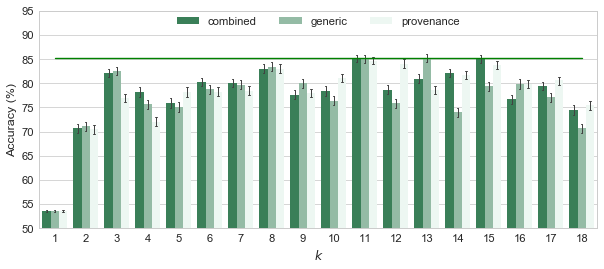

In [19]:
pal = sns.light_palette("seagreen", n_colors=3, reverse=True)
plot = sns.barplot(x="$k$", y="Accuracy", hue='Metrics', palette=pal, errwidth=1, capsize=0.04, data=results)
plot.figure.set_size_inches((10, 4))
plot.legend(loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=3)
plot.set_ylabel('Accuracy (%)')
plot.set_ylim(50, 95)

# drawing a line at the highest accuracy for visual comparison between configurations
highest_accuracy = results_means_ci['mean'].max()
plot.axes.plot([0, 17], [highest_accuracy, highest_accuracy], 'g')
highest_accuracy

The chart shows that the configurations yield the highest accuracy are: $k = 11$ - `combined`/`generic`/`provenance`, $k = 13$ - `generic`, and $k = 15$ - `combined`. The accuracy level seems to decrease with $k > 15$.

Saving the chart above to `Fig6.eps` to be included in the paper:

In [20]:
plot.figure.savefig("figures/Fig6.eps")

## Analysing the importance of features

In this section, we explore the relevance of each features in classifying messages in RRG. To do so, we analyse the feature importance values provided by the decision tree training done above - the `importances` data frame.

In [21]:
# Rename the columns with Math notation for consistency with the metrics symbols in the paper
feature_name_maths_mapping = {
    "entities": "$n_e$", "agents": "$n_{ag}$", "activities": "$n_a$", "nodes": "$n$", "edges": "$e$",
    "diameter": "$d$", "assortativity": "$r$", "acc": "$\\mathsf{ACC}$",
    "acc_e": "$\\mathsf{ACC}_e$",  "acc_a": "$\\mathsf{ACC}_a$",  "acc_ag": "$\\mathsf{ACC}_{ag}$",
    "mfd_e_e": "$\\mathrm{mfd}_{e \\rightarrow e}$", "mfd_e_a": "$\\mathrm{mfd}_{e \\rightarrow a}$",
    "mfd_e_ag": "$\\mathrm{mfd}_{e \\rightarrow ag}$", "mfd_a_e": "$\\mathrm{mfd}_{a \\rightarrow e}$",
    "mfd_a_a": "$\\mathrm{mfd}_{a \\rightarrow a}$", "mfd_a_ag": "$\\mathrm{mfd}_{a \\rightarrow ag}$",
    "mfd_ag_e": "$\\mathrm{mfd}_{ag \\rightarrow e}$", "mfd_ag_a": "$\\mathrm{mfd}_{ag \\rightarrow a}$",
    "mfd_ag_ag": "$\\mathrm{mfd}_{ag \\rightarrow ag}$", "mfd_der": "$\\mathrm{mfd}_\\mathit{der}$", "powerlaw_alpha": "$\\alpha$"
}
importances.rename(columns=feature_name_maths_mapping, inplace=True)

In [22]:
grouped =importances.groupby("$k$")  # Grouping the importance values by k

In [23]:
# Calculate the mean importance of each feature for each data type
imp_means = grouped.mean()

In [24]:
three_most_relevant_metrics = pd.DataFrame(
    {row_name: row.sort_values(ascending=False)[:3].index.get_values()  # three highest importance values in each row
        for row_name, row in imp_means.iterrows()
    }
)
three_most_relevant_metrics

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,$\alpha$,$e$,$e$,$e$,$n_e$,$n$,$n_e$,$n$,$e$,$n_e$,$n_e$,$e$,$e$,$\mathrm{mfd}_{e \rightarrow a}$,$e$,$n_e$,$\mathrm{mfd}_{a \rightarrow a}$,$\mathrm{mfd}_{a \rightarrow a}$
1,$\mathrm{mfd}_\mathit{der}$,$r$,$n_e$,$n_e$,$n$,$\mathrm{mfd}_{a \rightarrow a}$,$e$,$n_e$,$\mathrm{mfd}_{e \rightarrow a}$,$e$,$\mathsf{ACC}_e$,$\mathrm{mfd}_{a \rightarrow e}$,$\mathrm{mfd}_{e \rightarrow a}$,$e$,$\mathrm{mfd}_{e \rightarrow a}$,$\mathrm{mfd}_{e \rightarrow a}$,$\mathrm{mfd}_{e \rightarrow a}$,$\mathrm{mfd}_{e \rightarrow a}$
2,$n_{ag}$,$n_a$,$\mathsf{ACC}$,$d$,$e$,$n_e$,$\mathsf{ACC}$,$e$,$r$,$n$,$\mathsf{ACC}$,$\mathrm{mfd}_{a \rightarrow a}$,$\mathsf{ACC}$,$n_e$,$n_e$,$\mathsf{ACC}_e$,$e$,$\mathsf{ACC}_e$


The table above shows the most important metrics as reported by the decision tree classifiers during their training for each value of $k$.

Apart from $k = 1$, whose performance is no better than the random baseline, we count the occurences of the most relevant metrics in cases where $k \geq 2$ to find the most common metrics in the table above.

In [25]:
metrics_occurrences = three_most_relevant_metrics.loc[:,2:].apply(pd.value_counts, axis=1).fillna(0)  # excluding k = 1
metrics_occurrences

,$\mathrm{mfd}_{a \rightarrow a}$,$\mathrm{mfd}_{a \rightarrow e}$,$\mathrm{mfd}_{e \rightarrow a}$,$\mathsf{ACC}$,$\mathsf{ACC}_e$,$d$,$e$,$n$,$n_a$,$n_e$,$r$
0,2.0,0.0,1.0,0.0,0.0,0.0,7.0,2.0,0.0,5.0,0.0
1,1.0,1.0,6.0,0.0,1.0,0.0,3.0,1.0,0.0,3.0,1.0
2,1.0,0.0,0.0,4.0,2.0,1.0,3.0,1.0,1.0,3.0,1.0


In [26]:
# sorting the sum of the metrics occurences
pd.DataFrame(metrics_occurrences.sum().sort_values(ascending=False), columns=['occurences'])

,occurences
$e$,13.0
$n_e$,11.0
$\mathrm{mfd}_{e \rightarrow a}$,7.0
$n$,4.0
$\mathsf{ACC}$,4.0
$\mathrm{mfd}_{a \rightarrow a}$,4.0
$\mathsf{ACC}_e$,3.0
$r$,2.0
$n_a$,1.0
$d$,1.0


As shown above, the number of edges $e$, the number of entities $n_e$, and the maximum finite distance between entities and activities $\mathrm{mfd}_{e \rightarrow a}$ are the most common metrics in the table of the most relevant metrics.